In [248]:
import datetime as dt

import numpy as np
import pandas as pd

import pyarrow.parquet as pq

import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings("ignore")

In [249]:
# Read Parquet file into an Arrow Table
table1 = pq.read_table("../02_Leveraged ETFs/00_data/MSTR.parquet")
table2 = pq.read_table("../02_Leveraged ETFs/00_data/MSTU.parquet")

# table1 = pq.read_table("../02_Leveraged ETFs/00_data/IBIT.parquet")
# table2 = pq.read_table("../02_Leveraged ETFs/00_data/BITU.parquet")

# table1 = pq.read_table("../02_Leveraged ETFs/00_data/IBIT.parquet")
# table2 = pq.read_table("../02_Leveraged ETFs/00_data/MSTR.parquet")      # Not an LETF but interesting case study due to the high exposure to Bitcoin

# table1 = pq.read_table("../02_Leveraged ETFs/00_data/TSLA.parquet")
# table2 = pq.read_table("../02_Leveraged ETFs/00_data/TSLL.parquet")

# table1 = pq.read_table("../02_Leveraged ETFs/00_data/TSLA.parquet")
# table2 = pq.read_table("../02_Leveraged ETFs/00_data/TSLS.parquet")

# table1 = pq.read_table("../02_Leveraged ETFs/00_data/QQQ.parquet")
# table2 = pq.read_table("../02_Leveraged ETFs/00_data/TQQQ.parquet")

# table1 = pq.read_table("../02_Leveraged ETFs/00_data/QQQ.parquet")
# table2 = pq.read_table("../02_Leveraged ETFs/00_data/SQQQ.parquet")

# table1 = pq.read_table("../02_Leveraged ETFs/00_data/SPY.parquet")       # Big Size File       
# table2 = pq.read_table("../02_Leveraged ETFs/00_data/UPRO.parquet")

# table1 = pq.read_table("../02_Leveraged ETFs/00_data/SPY.parquet")       # Big Size File
# table2 = pq.read_table("../02_Leveraged ETFs/00_data/SPXL.parquet")

# table1 = pq.read_table("../02_Leveraged ETFs/00_data/SPY.parquet")       # Big Size File
# table2 = pq.read_table("../02_Leveraged ETFs/00_data/SPXU.parquet")

# table1 = pq.read_table("../02_Leveraged ETFs/00_data/UPRO.parquet")
# table2 = pq.read_table("../02_Leveraged ETFs/00_data/SPXL.parquet")

# table1 = pq.read_table("../02_Leveraged ETFs/00_data/SPXL.parquet")
# table2 = pq.read_table("../02_Leveraged ETFs/00_data/SPXU.parquet")

In [250]:

# Convert Arrow Table back to Pandas DataFrame
df1 = table1.to_pandas()
df2 = table2.to_pandas() # (df2 usually is the leveraged ETF)

In [251]:
# # Extract Ticker symbols directly from df1 and df2, column 'Ticker', unique values
ticker1 = df1['Ticker'].unique()[0]
ticker2 = df2['Ticker'].unique()[0]

In [252]:
df1.head()

,Date,Ticker,T,Open,High,Low,Close,Volume,VWAP,N
0,2003-10-09 09:29:00,MSTR,1065706140000,5.0210,5.091,5.017,5.091,30000.0,5.0586,22
1,2003-10-09 09:30:00,MSTR,1065706200000,5.0851,5.094,5.085,5.094,25990.0,5.0907,10
2,2003-10-09 09:31:00,MSTR,1065706260000,5.0940,5.094,5.070,5.070,60510.0,5.0839,16
3,2003-10-09 09:32:00,MSTR,1065706320000,5.0700,5.075,5.070,5.075,2000.0,5.0725,2
4,2003-10-09 09:33:00,MSTR,1065706380000,5.0620,5.062,5.052,5.052,2000.0,5.0570,2


In [253]:
print(df1.columns)

"""
T: This is a timestamp in milliseconds (Unix epoch time). 
The value 1760140500000 converts to October 10, 2025, 19:55:00 UTC, which matches the Date column.

N: This is likely the number of trades or number of data points used to calculate the VWAP for that time interval. 
The value 26 suggests 26 individual trades or ticks were aggregated.

The N column provides useful information about data quality. 
Higher values of N typically indicate more liquid trading periods with better VWAP reliability
""";

Index(['Date', 'Ticker', 'T', 'Open', 'High', 'Low', 'Close', 'Volume', 'VWAP',
       'N'],
      dtype='object')


In [254]:
df1.tail()

,Date,Ticker,T,Open,High,Low,Close,Volume,VWAP,N
1414722,2025-10-10 19:55:00,MSTR,1760140500000,300.960,300.960,300.9600,300.9600,317.0,300.5696,26
1414723,2025-10-10 19:56:00,MSTR,1760140560000,300.960,300.960,300.0000,300.5000,1803.0,300.2599,41
1414724,2025-10-10 19:57:00,MSTR,1760140620000,300.890,300.890,300.0903,300.0903,938.0,300.4362,34
1414725,2025-10-10 19:58:00,MSTR,1760140680000,300.019,300.019,300.0000,300.0000,447.0,300.2485,25
1414726,2025-10-10 19:59:00,MSTR,1760140740000,300.000,300.070,299.2100,299.2100,1427.0,299.9531,79


In [255]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1414727 entries, 0 to 1414726
Data columns (total 10 columns):
 #   Column  Non-Null Count    Dtype         
---  ------  --------------    -----         
 0   Date    1414727 non-null  datetime64[ns]
 1   Ticker  1414727 non-null  object        
 2   T       1414727 non-null  int64         
 3   Open    1414727 non-null  float64       
 4   High    1414727 non-null  float64       
 5   Low     1414727 non-null  float64       
 6   Close   1414727 non-null  float64       
 7   Volume  1414727 non-null  float64       
 8   VWAP    1414727 non-null  float64       
 9   N       1414727 non-null  int64         
dtypes: datetime64[ns](1), float64(6), int64(2), object(1)
memory usage: 107.9+ MB


In [256]:
df2.tail(5)

,Date,Ticker,T,Open,High,Low,Close,Volume,VWAP,N
229975,2025-10-10 19:55:00,MSTU,1760140500000,3.98,3.99,3.98,3.9800,8697.0,3.9859,42
229976,2025-10-10 19:56:00,MSTU,1760140560000,3.98,3.99,3.98,3.9900,25109.0,3.9885,22
229977,2025-10-10 19:57:00,MSTU,1760140620000,3.99,3.99,3.98,3.9897,5215.0,3.9868,19
229978,2025-10-10 19:58:00,MSTU,1760140680000,3.98,3.99,3.97,3.9800,9029.0,3.9793,52
229979,2025-10-10 19:59:00,MSTU,1760140740000,3.97,3.98,3.96,3.9700,17293.0,3.9708,43


In [257]:
# Add year, month, day, hour, minute columns for easier filtering on df1 and df2
for df in [df1, df2]:
    df['year'] = pd.to_datetime(df['Date']).dt.year
    df['month'] = pd.to_datetime(df['Date']).dt.month
    df['day'] = pd.to_datetime(df['Date']).dt.day
    df['hour'] = pd.to_datetime(df['Date']).dt.hour
    df['minute'] = pd.to_datetime(df['Date']).dt.minute

In [258]:
# Add a new column 'ym' representing the last day of each month on df1 and df2
for df in [df1, df2]:
    df['ym'] = pd.to_datetime(df['Date']).dt.to_period('M').dt.to_timestamp('M') + pd.offsets.MonthEnd(0)

In [259]:
# Create trading day counter for minute-level data
for df in [df1, df2]:
    # First, extract just the date (without time) from the datetime
    df['date_only'] = pd.to_datetime(df['Date']).dt.date
    
    # For each year-month group, get unique dates and assign trading day numbers
    df['td'] = df.groupby('ym')['date_only'].transform(
        lambda x: pd.factorize(x)[0] + 1
    )

In [260]:
# Add week number, dt.isocalendar()[1]  # ISO week number
for df in [df1, df2]:
    df['week_number'] = pd.to_datetime(df['Date']).dt.isocalendar().week

In [261]:
# Add day identifier, int to indicate the day of week (0=Monday, 6=Sunday) on df1 and df2
for df in [df1, df2]:
    df['day_of_week'] = pd.to_datetime(df['Date']).dt.dayofweek

In [262]:
# VWAP signal, if Close > VWAP -> 1 else 0 on df1 and df2
for df in [df1, df2]:
    df['vwap_signal'] = np.where(df['Close'] > df['VWAP'], 1, 0)

In [263]:
# Calculate daily simple returns for df1 and df2
# Calculate percentage change of 'Close' within each ticker
df1['ret'] = df1.groupby('Ticker')['Close'].pct_change()
df2['ret'] = df2.groupby('Ticker')['Close'].pct_change()

# fill na values in ret with 0
df1['ret'] = df1['ret'].fillna(0)
df2['ret'] = df2['ret'].fillna(0)

In [264]:
# calculate cumulative returns for df1 and df2
df1['cumret'] = (1 + df1['ret']).cumprod() - 1
df2['cumret'] = (1 + df2['ret']).cumprod() - 1

In [265]:
# Filter last 180 days of data for both df1 and df2
end_date = max(df1['Date'].max(), df2['Date'].max())
start_date = end_date - pd.Timedelta(days=180)
df1_last_180 = df1[df1['Date'] >= start_date]
df2_last_180 = df2[df2['Date'] >= start_date]

In [266]:
"""
Leveraged ETFs tend to have lower length of data compared to their underlying assets due to most recent inception dates.
Apply below filtering only when comparing leveraged ETF with its underlying asset.
""";

In [267]:
# Filter df1 by min() date of df2.date_only (df2 usually is the leveraged ETF, with shorter history)
min_date_df2 = df2['date_only'].min()
df1 = df1[df1['date_only'] >= min_date_df2]

In [268]:
# Add backtest df to be used for strategies backtesting
bt1 = df1.copy()
bt2 = df2.copy()

In [269]:
# # Filter df1 and df2 for Market hours only (9:30 to 16:00), Intraday data
# market_hours_df1 = df1[(df1['hour'] >= 9) & ((df1['hour'] < 16) | ((df1['hour'] == 9) & (df1['minute'] >= 30)))].copy()
# market_hours_df2 = df2[(df2['hour'] >= 9) & ((df2['hour'] < 16) | ((df2['hour'] == 9) & (df2['minute'] >= 30)))].copy()

# # Filter df1 and df2 for first hour of market only
# first_hour_df1 = df1[((df1['hour'] == 9) & (df1['minute'] >= 30)) | (df1['hour'] == 10)].copy()
# first_hour_df2 = df2[((df2['hour'] == 9) & (df2['minute'] >= 30)) | (df2['hour'] == 10)].copy()

# # Filter df1 and df2 for last hour of market only
# last_hour_df1 = df1[(df1['hour'] == 15)].copy()
# last_hour_df2 = df2[(df2['hour'] == 15)].copy()

In [270]:
# Group df1 and df2 by date_only and calculate daily returns
df1_daily = df1.groupby('date_only').agg({'Close': 'last'}).reset_index()
df1_daily['ret'] = df1_daily['Close'].pct_change().fillna(0)
df1_daily['cumret'] = (1 + df1_daily['ret']).cumprod() - 1
df2_daily = df2.groupby('date_only').agg({'Close': 'last'}).reset_index()
df2_daily['ret'] = df2_daily['Close'].pct_change().fillna(0)
df2_daily['cumret'] = (1 + df2_daily['ret']).cumprod() - 1

# Join df1_daily and df2_daily on date_only
df_joined = df1_daily.merge(df2_daily, on='date_only', suffixes=(f'_{ticker1}', f'_{ticker2}'))

# Display first few rows of df_joined
df_joined.head()

,date_only,Close_MSTR,ret_MSTR,cumret_MSTR,Close_MSTU,ret_MSTU,cumret_MSTU
0,2024-09-18,135.7400,0.000000,0.000000,2.6820,0.000000,0.000000
1,2024-09-19,144.5000,0.064535,0.064535,3.0150,0.124161,0.124161
2,2024-09-20,145.2000,0.004844,0.069692,3.0440,0.009619,0.134974
3,2024-09-23,149.2977,0.028221,0.099880,3.2029,0.052201,0.194221
4,2024-09-24,154.2246,0.033001,0.136177,3.3930,0.059352,0.265101


In [271]:
bt1.head()

,Date,Ticker,T,Open,High,Low,Close,Volume,VWAP,N,...,hour,minute,ym,date_only,td,week_number,day_of_week,vwap_signal,ret,cumret
1213936,2024-09-18 04:00:00,MSTR,1726646400000,132.75,132.75,132.75,132.75,412.0,132.5968,25,...,4,0,2024-09-30,2024-09-18,12,38,2,1,0.006063,25.075427
1213937,2024-09-18 04:01:00,MSTR,1726646460000,132.33,132.33,132.33,132.33,736.0,132.3750,35,...,4,1,2024-09-30,2024-09-18,12,38,2,0,-0.003164,24.992929
1213938,2024-09-18 04:02:00,MSTR,1726646520000,132.66,133.49,132.66,133.30,3992.0,132.9765,117,...,4,2,2024-09-30,2024-09-18,12,38,2,1,0.007330,25.183461
1213939,2024-09-18 04:03:00,MSTR,1726646580000,133.10,133.25,133.10,133.25,2050.0,133.1477,89,...,4,3,2024-09-30,2024-09-18,12,38,2,1,-0.000375,25.173640
1213940,2024-09-18 04:04:00,MSTR,1726646640000,133.25,133.25,133.00,133.00,1348.0,133.1446,20,...,4,4,2024-09-30,2024-09-18,12,38,2,0,-0.001876,25.124533


In [272]:
# Create daily df, grouping by date_only and aggregating OHLCV data (keep last for Open, High, Low, Close; sum for Volume)
daily_df1 = bt1.groupby('date_only').agg({
    'Open': 'first',
    'High': 'max',
    'Low': 'min',
    'Close': 'last',
    'Volume': 'sum'
}).reset_index()

daily_df2 = bt2.groupby('date_only').agg({
    'Open': 'first',
    'High': 'max',
    'Low': 'min',   
    'Close': 'last',
    'Volume': 'sum'
}).reset_index()

In [273]:
daily_df1.head()

,date_only,Open,High,Low,Close,Volume
0,2024-09-18,132.75,139.49,128.5100,135.7400,14814131.0
1,2024-09-19,138.88,148.96,137.5300,144.5000,18501774.0
2,2024-09-20,146.50,149.00,141.6400,145.2000,9264825.0
3,2024-09-23,147.80,151.59,145.0149,149.2977,9170356.0
4,2024-09-24,150.03,154.85,146.7074,154.2246,8759102.0


In [274]:
# # Plot daily df for visualization purposes
# plt.figure(figsize=(14, 7))
# # plt.plot(daily_df1['date_only'], daily_df1['Close'], label=ticker1, color='blue')
# plt.plot(daily_df2['date_only'], daily_df2['Close'], label=ticker2, color='orange')
# plt.title(f'Daily Close Prices: {ticker1} vs {ticker2}')
# plt.xlabel('Date')
# plt.ylabel('Close Price')
# plt.legend()
# plt.show()

In [275]:
# ----------------------------------------------------------------------
# Intraday Strategy, "End-of-Day Reversal" Analysis
# ---------------------------------------------------------------------- 

In [276]:
"""
paper: End-of-Day Reversal

The main time slots and their combinations, as defined in the sources, are:

1. Overnight (ON): The period from the market close to the market open.

2. First half-hour (FH): The first 30 minutes after the market open.

3. Middle-of-the-day (M): The period from the end of FH until one hour before the market close. 
It is specifically defined as the return from 10:00 a.m. to 3:00 p.m. on the given day.

4. Second-to-last half-hour (SLH): The second-to-last 30-minute interval before the market close.

5. Last half-hour (LH): The last 30 minutes before the market close (3:30 p.m. to 4:00 p.m. EST).

Combinations of these time periods are also used as key predictor variables:
• ONFH: The combination of ON and FH.
• ROD3 (Rest-Of-Day-3): The combination of ON, FH, and M, which is the key predictor for much of the analysis. 
ROD3 represents the return from the market close on day t−1 until 3:00 p.m. on day t.

""";

In [277]:
# Define the dfs
eod1 = bt1.copy()  # Intraday data
eod2 = bt2.copy()  # Intraday data

In [278]:
def add_time_periods(df):
    """
    Add time period flags according to the paper:
    - ON (Overnight): From market close (16:00) to market open (9:30)
    - FH (First Half-hour): 9:30 to 10:00
    - M (Middle-of-the-day): 10:00 to 15:00  
    - SLH (Second-to-Last Half-hour): 15:00 to 15:30
    - LH (Last Half-hour): 15:30 to 16:00
    """
    df = df.copy()
    
    # Initialize time period flag
    df['time_period'] = 'Unknown'
    
    # Overnight (ON): 16:00 onwards OR before 9:30
    df.loc[
        (df['hour'] >= 16) |
        (df['hour'] < 9) |
        ((df['hour'] == 9) & (df['minute'] < 30)),
        'time_period'
    ] = 'ON'
    
    # First Half-hour (FH): 9:30 to 9:59
    df.loc[
        (df['hour'] == 9) & (df['minute'] >= 30),
        'time_period'
    ] = 'FH'
    
    # Middle-of-the-day (M): 10:00 to 14:59
    df.loc[
        (df['hour'] >= 10) & (df['hour'] < 15),
        'time_period'
    ] = 'M'
    
    # Second-to-Last Half-hour (SLH): 15:00 to 15:29
    df.loc[
        (df['hour'] == 15) & (df['minute'] < 30),
        'time_period'
    ] = 'SLH'
    
    # Last Half-hour (LH): 15:30 to 15:59
    df.loc[
        (df['hour'] == 15) & (df['minute'] >= 30),
        'time_period'
    ] = 'LH'
    
    return df

eod1 = add_time_periods(eod1)
eod2 = add_time_periods(eod2)

In [279]:
# Print unique time periods to verify
print("Unique time periods in ticker 1 data:", eod1['time_period'].unique())
print("Unique time periods in ticker 2 data:", eod2['time_period'].unique())

Unique time periods in ticker 1 data: ['ON' 'FH' 'M' 'SLH' 'LH']
Unique time periods in ticker 2 data: ['FH' 'M' 'SLH' 'LH' 'ON']


In [280]:
# Verify time period boundaries
print("=== Time Period Verification ===")

print(f"\nFH (9:30-10:00):")
fh_data = eod1[eod1['time_period'] == 'FH']
print(f"  Min: {fh_data[['hour', 'minute']].min().tolist()}")
print(f"  Max: {fh_data[['hour', 'minute']].max().tolist()}")

print(f"\nM (10:00-15:00):")
m_data = eod1[eod1['time_period'] == 'M']
print(f"  Min: {m_data[['hour', 'minute']].min().tolist()}")
print(f"  Max: {m_data[['hour', 'minute']].max().tolist()}")

print(f"\nSLH (15:00-15:30):")
slh_data = eod1[eod1['time_period'] == 'SLH']
print(f"  Min: {slh_data[['hour', 'minute']].min().tolist()}")
print(f"  Max: {slh_data[['hour', 'minute']].max().tolist()}")

print(f"\nLH (15:30-16:00):")
lh_data = eod1[eod1['time_period'] == 'LH']
print(f"  Min: {lh_data[['hour', 'minute']].min().tolist()}")
print(f"  Max: {lh_data[['hour', 'minute']].max().tolist()}")

print(f"\nON (overnight):")
on_data = eod1[eod1['time_period'] == 'ON']
print(f"  Min: {on_data[['hour', 'minute']].min().tolist()}")
print(f"  Max: {on_data[['hour', 'minute']].max().tolist()}")

print("\n=== Time Period Distribution ===")
print(eod1['time_period'].value_counts())

=== Time Period Verification ===

FH (9:30-10:00):
  Min: [9, 30]
  Max: [9, 59]

M (10:00-15:00):
  Min: [10, 0]
  Max: [14, 59]

SLH (15:00-15:30):
  Min: [15, 0]
  Max: [15, 29]

LH (15:30-16:00):
  Min: [15, 30]
  Max: [15, 59]

ON (overnight):
  Min: [4, 0]
  Max: [19, 59]

=== Time Period Distribution ===
time_period
ON     97198
M      79743
FH      8010
SLH     7920
LH      7920
Name: count, dtype: int64


In [281]:
eod1.head(5)

,Date,Ticker,T,Open,High,Low,Close,Volume,VWAP,N,...,minute,ym,date_only,td,week_number,day_of_week,vwap_signal,ret,cumret,time_period
1213936,2024-09-18 04:00:00,MSTR,1726646400000,132.75,132.75,132.75,132.75,412.0,132.5968,25,...,0,2024-09-30,2024-09-18,12,38,2,1,0.006063,25.075427,ON
1213937,2024-09-18 04:01:00,MSTR,1726646460000,132.33,132.33,132.33,132.33,736.0,132.3750,35,...,1,2024-09-30,2024-09-18,12,38,2,0,-0.003164,24.992929,ON
1213938,2024-09-18 04:02:00,MSTR,1726646520000,132.66,133.49,132.66,133.30,3992.0,132.9765,117,...,2,2024-09-30,2024-09-18,12,38,2,1,0.007330,25.183461,ON
1213939,2024-09-18 04:03:00,MSTR,1726646580000,133.10,133.25,133.10,133.25,2050.0,133.1477,89,...,3,2024-09-30,2024-09-18,12,38,2,1,-0.000375,25.173640,ON
1213940,2024-09-18 04:04:00,MSTR,1726646640000,133.25,133.25,133.00,133.00,1348.0,133.1446,20,...,4,2024-09-30,2024-09-18,12,38,2,0,-0.001876,25.124533,ON


In [282]:
# # Working and correct

# def calculate_period_returns(df):
#     """
#     Calculate returns for each time period per day.
#     Returns a daily DataFrame with columns for each period's return.
#     """
#     df = df.copy()
#     df = df.sort_values('Date')
    
#     # Get first and last price for each period on each day
#     period_prices = df.groupby(['date_only', 'time_period']).agg({
#         'Open': 'first',   # First bar's open price
#         'Close': 'last'    # Last bar's close price
#     }).reset_index()

#     period_prices.columns = ['date_only', 'time_period', 'first_open', 'last_close']
#     period_prices['period_ret'] = (period_prices['last_close'] / period_prices['first_open']) - 1
    
#     # Pivot to get one row per day with columns for each period
#     daily_returns = period_prices.pivot(
#         index='date_only', 
#         columns='time_period', 
#         values='period_ret'
#     ).reset_index()
    
#     # Rename columns
#     daily_returns.columns.name = None
    
#     # Calculate combination returns
#     # ONFH = (1 + ON) * (1 + FH) - 1
#     if 'ON' in daily_returns.columns and 'FH' in daily_returns.columns:
#         daily_returns['ONFH'] = (1 + daily_returns['ON'].fillna(0)) * (1 + daily_returns['FH'].fillna(0)) - 1
    
#     # ROD3 = (1 + ON) * (1 + FH) * (1 + M) - 1
#     if all(col in daily_returns.columns for col in ['ON', 'FH', 'M']):
#         daily_returns['ROD3'] = (
#             (1 + daily_returns['ON'].fillna(0)) * 
#             (1 + daily_returns['FH'].fillna(0)) * 
#             (1 + daily_returns['M'].fillna(0)) - 1
#         )
    
#     return daily_returns

# # Calculate period returns for both tickers
# period_returns1 = calculate_period_returns(eod1)
# period_returns2 = calculate_period_returns(eod2)

# print(f"Period returns for {ticker1}:")
# print(period_returns1.head(10))
# print(f"\nPeriod returns for {ticker2}:")
# print(period_returns2.head(10))

In [283]:
#  Modified to calculate ON returns
#  This properly captures the full overnight gap from the previous 
#  day's last trading close to the current day's market open.
def calculate_period_returns(df):
    """
    Calculate returns for each time period per day.
    Returns a daily DataFrame with columns for each period's return.
    
    ON (Overnight) is calculated as: (Open at 9:30 on day t) / (Close at 16:00 on day t-1) - 1
    This properly spans the overnight gap including AH and pre-market.
    """
    df = df.copy()
    df = df.sort_values('Date')
    
    # === Calculate market hours periods (FH, M, SLH, LH) ===
    # These are calculated within the same day
    market_periods = df[df['time_period'].isin(['FH', 'M', 'SLH', 'LH'])]
    
    period_prices = market_periods.groupby(['date_only', 'time_period']).agg({
        'Open': 'first',   # First bar's open price
        'Close': 'last'    # Last bar's close price
    }).reset_index()
    
    period_prices.columns = ['date_only', 'time_period', 'first_open', 'last_close']
    period_prices['period_ret'] = (period_prices['last_close'] / period_prices['first_open']) - 1
    
    # Pivot to get one row per day with columns for each period
    daily_returns = period_prices.pivot(
        index='date_only', 
        columns='time_period', 
        values='period_ret'
    ).reset_index()
    daily_returns.columns.name = None
    
    # === Calculate ON (Overnight) return properly ===
    # ON = (First market open price on day t) / (Last close price on day t-1) - 1
    
    # Get the first FH open price for each day (market open at 9:30)
    fh_opens = df[df['time_period'] == 'FH'].groupby('date_only').agg({
        'Open': 'first'
    }).reset_index()
    fh_opens.columns = ['date_only', 'market_open']
    
    # Get the last LH close price for each day (market close at ~15:59)
    lh_closes = df[df['time_period'] == 'LH'].groupby('date_only').agg({
        'Close': 'last'
    }).reset_index()
    lh_closes.columns = ['date_only', 'market_close']
    
    # Shift the market close to align with next day's market open
    lh_closes['next_date'] = lh_closes['date_only'].shift(-1)
    lh_closes = lh_closes.dropna(subset=['next_date'])
    
    # Convert next_date to match the date type
    lh_closes['next_date'] = pd.to_datetime(lh_closes['next_date']).dt.date
    
    # Merge to get previous day's close with current day's open
    on_calc = fh_opens.merge(
        lh_closes[['next_date', 'market_close']],
        left_on='date_only',
        right_on='next_date',
        how='left'
    )
    
    # Calculate overnight return
    on_calc['ON'] = (on_calc['market_open'] / on_calc['market_close']) - 1
    
    # Merge ON returns with the daily returns
    daily_returns = daily_returns.merge(
        on_calc[['date_only', 'ON']],
        on='date_only',
        how='left'
    )
    
    # === Calculate combination returns ===
    # ONFH = (1 + ON) * (1 + FH) - 1
    if 'ON' in daily_returns.columns and 'FH' in daily_returns.columns:
        daily_returns['ONFH'] = (1 + daily_returns['ON'].fillna(0)) * (1 + daily_returns['FH'].fillna(0)) - 1
    
    # ROD3 = (1 + ON) * (1 + FH) * (1 + M) - 1
    if all(col in daily_returns.columns for col in ['ON', 'FH', 'M']):
        daily_returns['ROD3'] = (
            (1 + daily_returns['ON'].fillna(0)) * 
            (1 + daily_returns['FH'].fillna(0)) * 
            (1 + daily_returns['M'].fillna(0)) - 1
        )
    
    return daily_returns

# Calculate period returns for both tickers
period_returns1 = calculate_period_returns(eod1)
period_returns2 = calculate_period_returns(eod2)

print(f"Period returns for {ticker1}:")
print(period_returns1.head(10))
print(f"\nPeriod returns for {ticker2}:")
print(period_returns2.head(10))

Period returns for MSTR:
    date_only        FH        LH         M       SLH        ON      ONFH  \
0  2024-09-18 -0.007213 -0.010224  0.040927 -0.006382       NaN -0.007213   
1  2024-09-19  0.016661 -0.005051  0.036026 -0.014820  0.058961  0.076604   
2  2024-09-20  0.000069 -0.007684  0.010110 -0.000274 -0.002659 -0.002590   
3  2024-09-23  0.008069  0.003747  0.007997 -0.002468  0.019635  0.027862   
4  2024-09-24  0.003729  0.012632  0.003387  0.006188  0.000866  0.004599   
5  2024-09-25  0.019468 -0.005628 -0.015488 -0.000785 -0.010525  0.008738   
6  2024-09-26  0.004441 -0.003994  0.052362 -0.002400  0.037449  0.042056   
7  2024-09-27  0.019768  0.014379  0.006669 -0.006523  0.028723  0.049059   
8  2024-09-30  0.028812 -0.012448 -0.015959  0.001195 -0.043831 -0.016282   
9  2024-10-01 -0.016556 -0.003493 -0.008094 -0.005360 -0.000386 -0.016935   

       ROD3  
0  0.033419  
1  0.115390  
2  0.007494  
3  0.036082  
4  0.008002  
5 -0.006885  
6  0.096621  
7  0.056055  
8

Verifying MSTR...


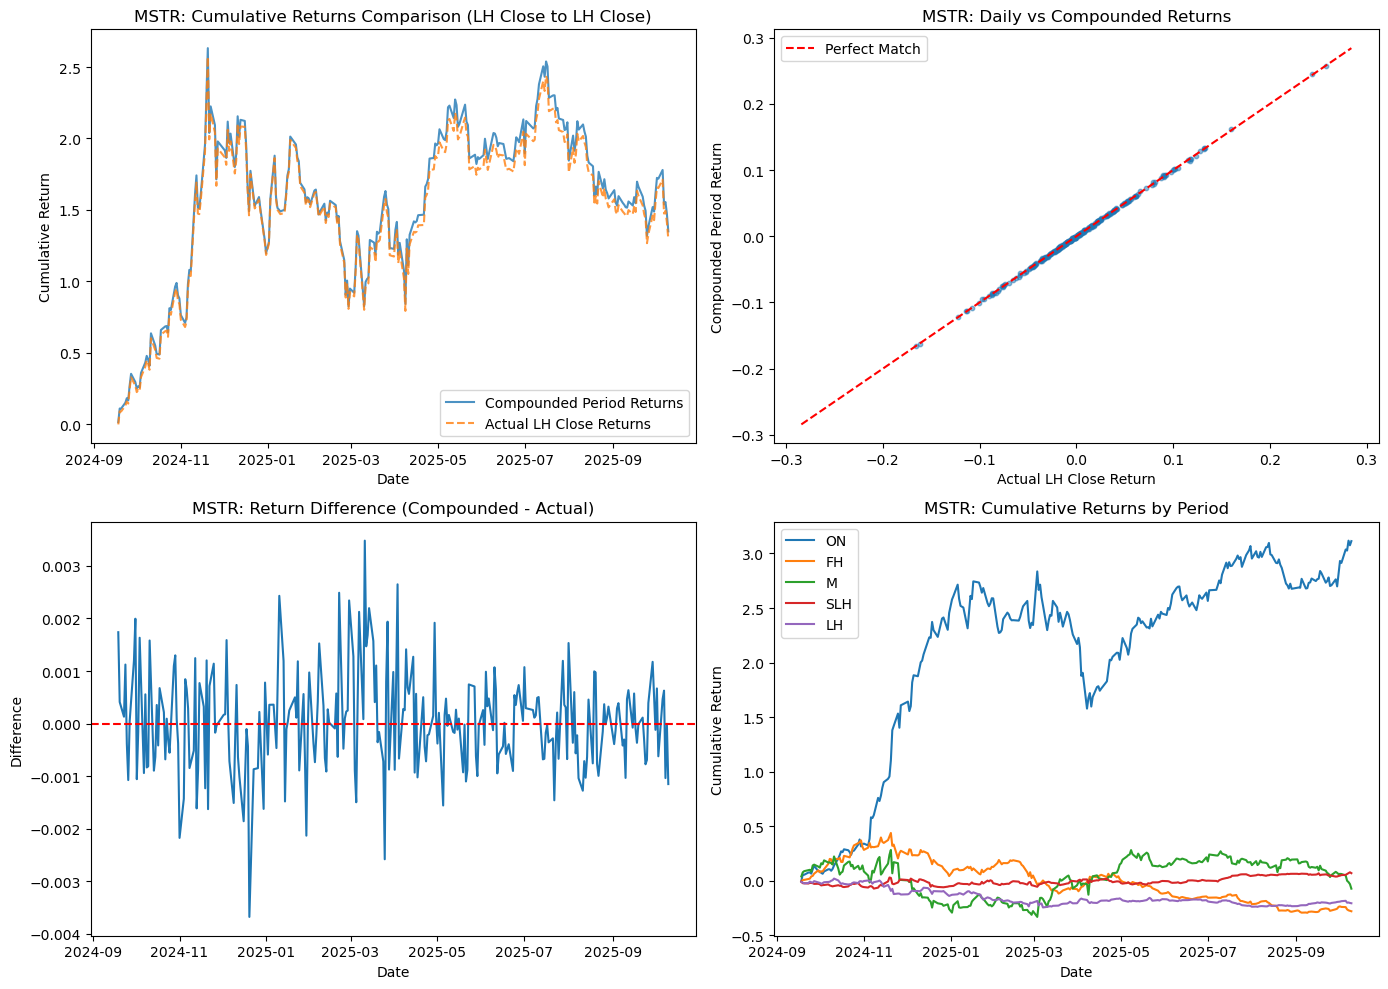


=== MSTR Verification Statistics ===
Mean absolute error: 0.000714
Max absolute error: 0.003677
Correlation: 0.999865

Verifying MSTU...


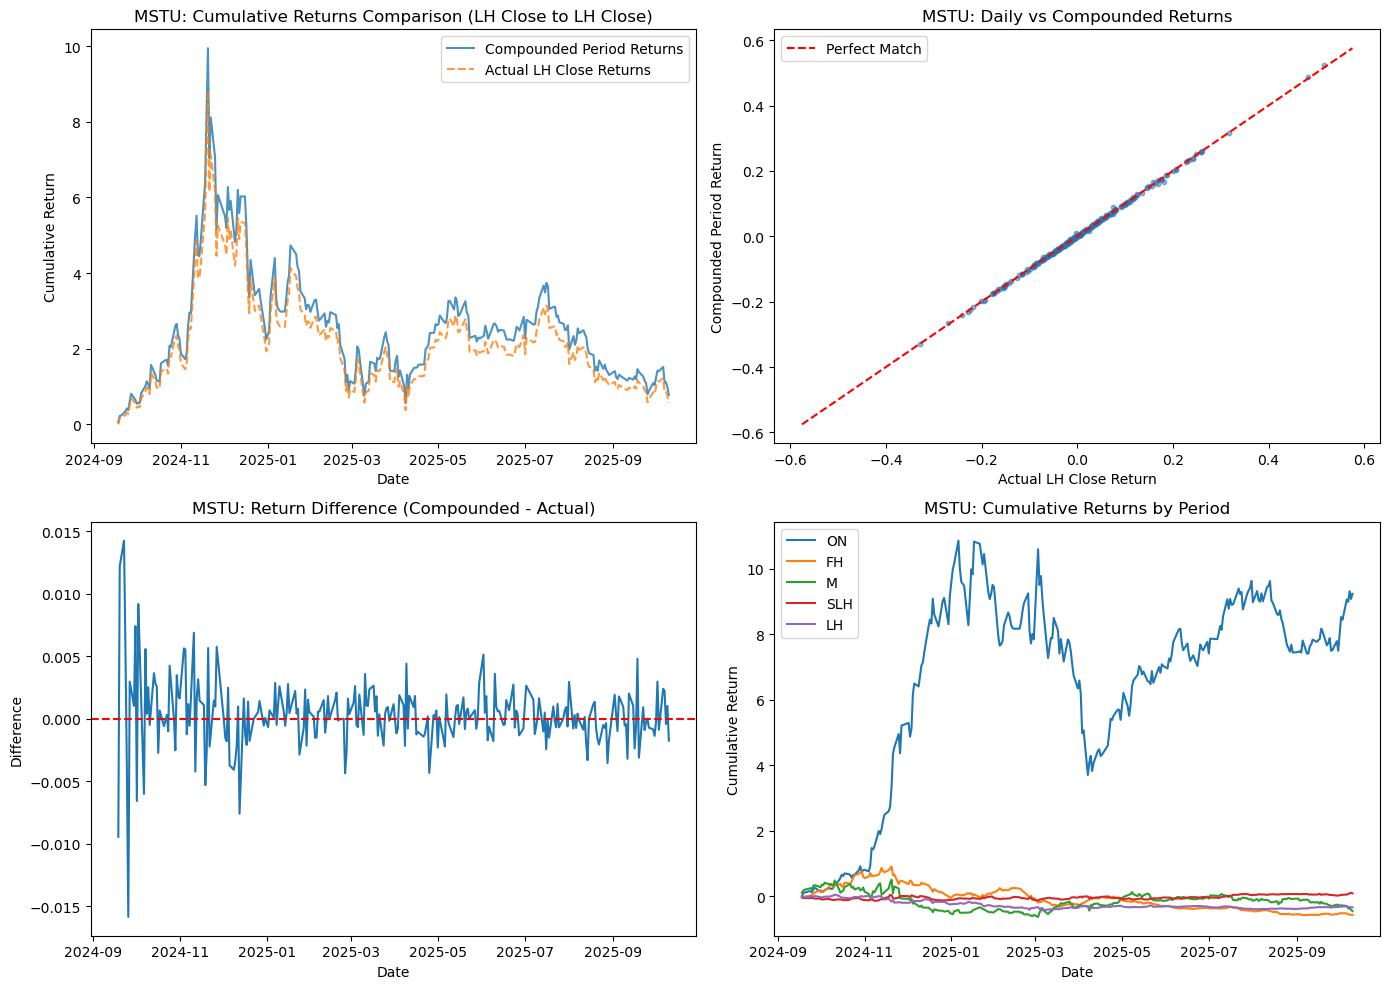


=== MSTU Verification Statistics ===
Mean absolute error: 0.001792
Max absolute error: 0.015857
Correlation: 0.999697


In [284]:
# Verify period returns sum to daily returns (LH close to LH close)
def verify_period_returns(period_returns, eod_df, ticker_name):
    """
    Verify that compounded period returns equal daily LH close-to-LH close returns.
    This is the correct comparison since ON is calculated from prev LH close to current FH open.
    """
    # Merge period returns with daily data
    verification = period_returns.copy()
    
    # Compound all periods: (1+ON)*(1+FH)*(1+M)*(1+SLH)*(1+LH) - 1
    periods = ['ON', 'FH', 'M', 'SLH', 'LH']
    available_periods = [p for p in periods if p in verification.columns]
    
    # Calculate compounded return from all periods
    verification['compounded_ret'] = 1
    for period in available_periods:
        verification['compounded_ret'] *= (1 + verification[period].fillna(0))
    verification['compounded_ret'] -= 1
    
    # Calculate actual daily return from LH close prices (market close ~15:59)
    lh_closes = eod_df[eod_df['time_period'] == 'LH'].groupby('date_only').agg({
        'Close': 'last'
    }).reset_index()
    lh_closes.columns = ['date_only', 'lh_close']
    lh_closes['actual_ret'] = lh_closes['lh_close'].pct_change()
    
    # Merge and compare
    comparison = verification.merge(
        lh_closes[['date_only', 'actual_ret', 'lh_close']], 
        on='date_only', 
        how='inner'
    )
    
    # Plot comparison
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    # 1. Cumulative returns comparison
    comparison['cum_compounded'] = (1 + comparison['compounded_ret']).cumprod() - 1
    comparison['cum_actual'] = (1 + comparison['actual_ret'].fillna(0)).cumprod() - 1
    
    axes[0, 0].plot(comparison['date_only'], comparison['cum_compounded'], label='Compounded Period Returns', alpha=0.8)
    axes[0, 0].plot(comparison['date_only'], comparison['cum_actual'], label='Actual LH Close Returns', alpha=0.8, linestyle='--')
    axes[0, 0].set_title(f'{ticker_name}: Cumulative Returns Comparison (LH Close to LH Close)')
    axes[0, 0].legend()
    axes[0, 0].set_xlabel('Date')
    axes[0, 0].set_ylabel('Cumulative Return')
    
    # 2. Daily returns scatter plot
    axes[0, 1].scatter(comparison['actual_ret'], comparison['compounded_ret'], alpha=0.5, s=10)
    max_val = max(comparison['actual_ret'].abs().max(), comparison['compounded_ret'].abs().max()) * 1.1
    axes[0, 1].plot([-max_val, max_val], [-max_val, max_val], 'r--', label='Perfect Match')
    axes[0, 1].set_title(f'{ticker_name}: Daily vs Compounded Returns')
    axes[0, 1].set_xlabel('Actual LH Close Return')
    axes[0, 1].set_ylabel('Compounded Period Return')
    axes[0, 1].legend()
    
    # 3. Difference (error) over time
    comparison['error'] = comparison['compounded_ret'] - comparison['actual_ret']
    axes[1, 0].plot(comparison['date_only'], comparison['error'])
    axes[1, 0].axhline(y=0, color='r', linestyle='--')
    axes[1, 0].set_title(f'{ticker_name}: Return Difference (Compounded - Actual)')
    axes[1, 0].set_xlabel('Date')
    axes[1, 0].set_ylabel('Difference')
    
    # 4. Individual period contributions
    period_cumrets = pd.DataFrame({'date_only': comparison['date_only']})
    for period in available_periods:
        period_cumrets[period] = (1 + comparison[period].fillna(0)).cumprod() - 1
    
    for period in available_periods:
        axes[1, 1].plot(period_cumrets['date_only'], period_cumrets[period], label=period)
    axes[1, 1].set_title(f'{ticker_name}: Cumulative Returns by Period')
    axes[1, 1].legend()
    axes[1, 1].set_xlabel('Date')
    axes[1, 1].set_ylabel('Cumulative Return')
    
    plt.tight_layout()
    plt.show()
    
    # Print statistics
    print(f"\n=== {ticker_name} Verification Statistics ===")
    print(f"Mean absolute error: {comparison['error'].abs().mean():.6f}")
    print(f"Max absolute error: {comparison['error'].abs().max():.6f}")
    print(f"Correlation: {comparison['compounded_ret'].corr(comparison['actual_ret']):.6f}")
    
    return comparison

# Run verification for both tickers (pass eod_df instead of daily_df)
print(f"Verifying {ticker1}...")
verification1 = verify_period_returns(period_returns1, eod1, ticker1)

print(f"\nVerifying {ticker2}...")
verification2 = verify_period_returns(period_returns2, eod2, ticker2)